## LIBRARIES :


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers , models
import matplotlib.pyplot as plt

## Load Fashion MNIST Dataset

In [34]:
from IPython.testing import test
( train_images , train_labels ) , (test_images , test_labels) = datasets.fashion_mnist.load_data()

# normalize pixel values ( 255 >>  1 )
train_images = train_images/255
test_images = test_images/255


# Reshape to add channel dimension (needed for CNN)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape
test_images.shape

(10000, 28, 28, 1)

## Visualize some images :

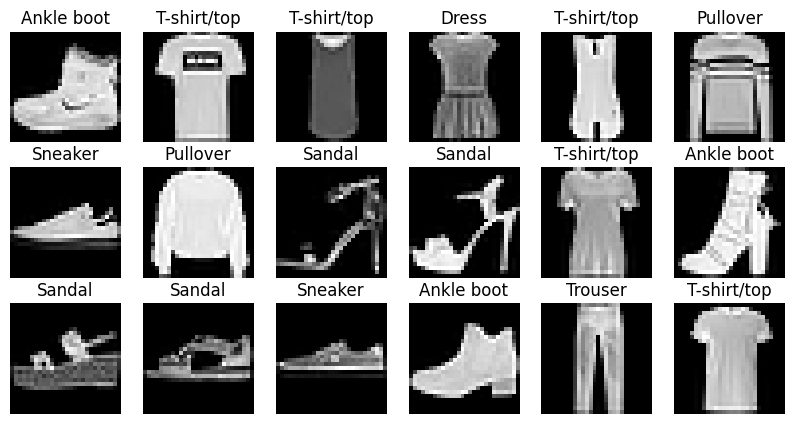

In [25]:
plt.figure(figsize = (10,5))
for i in range(18) :
    plt.subplot(3,6,i+1)
    plt.imshow(train_images[i].reshape(28,28),cmap = 'gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

## Build cnn model :

In [29]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape = (28,28,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3) ,activation = 'relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128,activation= 'relu'),
    layers.Dense(10,activation="softmax") # 10 output classes
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model + train the model



In [39]:
from prompt_toolkit import history
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(train_images, train_labels , epochs = 20 ,
                     validation_data= (test_images,test_labels))

# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n✅ Test accuracy:", test_acc)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9627 - loss: 0.1014 - val_accuracy: 0.9156 - val_loss: 0.2823
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9677 - loss: 0.0873 - val_accuracy: 0.9104 - val_loss: 0.3034
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9720 - loss: 0.0772 - val_accuracy: 0.9166 - val_loss: 0.3104
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9749 - loss: 0.0667 - val_accuracy: 0.9100 - val_loss: 0.3442
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9780 - loss: 0.0579 - val_accuracy: 0.9073 - val_loss: 0.3820
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9805 - loss: 0.0530 - val_accuracy: 0.9115 - val_loss: 0.3770
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9827 - loss: 0.0473 - val_accuracy: 0.9075 - val_loss: 0.3866
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9846 - loss: 0.0428 -

## Using dropout randomly during the training


In [41]:
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Drop neurons randomly during training
    layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history2 = model2.fit(train_images, train_labels , epochs = 20 ,
                     validation_data= (test_images,test_labels))

# Evaluate the Model
test_loss2, test_acc2 = model.evaluate(test_images, test_labels, verbose=2)
print("\n✅ Test accuracy ( dropout ):", test_acc2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6831 - loss: 0.8602 - val_accuracy: 0.8458 - val_loss: 0.4043
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8361 - loss: 0.4463 - val_accuracy: 0.8739 - val_loss: 0.3532
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8589 - loss: 0.3926 - val_accuracy: 0.8810 - val_loss: 0.3203
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8677 - loss: 0.3615 - val_accuracy: 0.8942 - val_loss: 0.2943
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8784 - loss: 0.3290 - val_accuracy: 0.8979 - val_loss: 0.2796
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8830 - loss: 0.3216 - val_accuracy: 0.8919 - val_loss: 0.2919
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8868 - loss: 0.3115 - val_accuracy: 0.8913 - val_loss: 0.2837
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8870 - loss: 0.3086 

## Compare Results



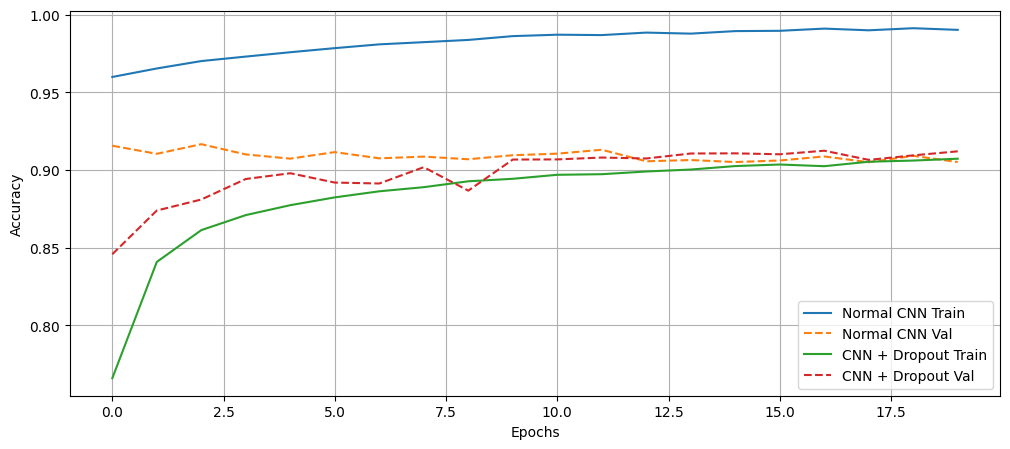

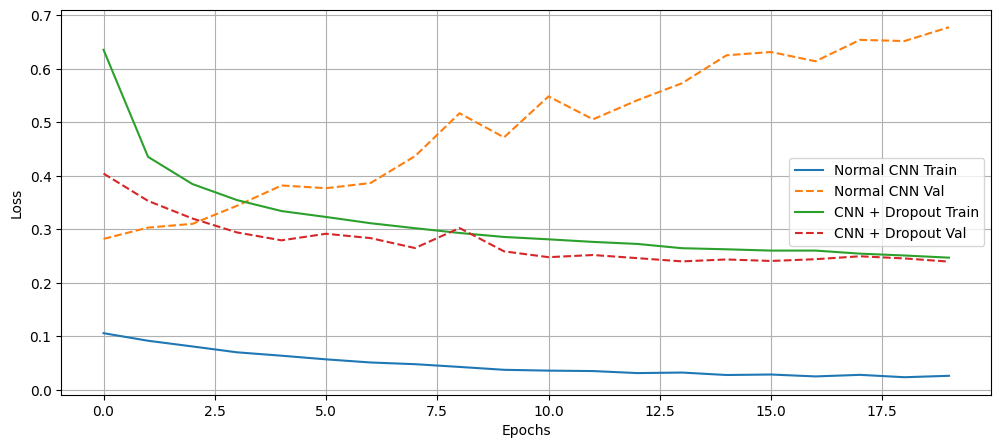

In [42]:
# Define Helper to Plot Results

def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(12,5))
    for name, history in histories:
        plt.plot(history.history[key], label=f'{name} Train')
        plt.plot(history.history[f'val_{key}'], linestyle='--', label=f'{name} Val')
    plt.xlabel('Epochs')
    plt.ylabel(key.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()


#  Compare Results
plot_history([('Normal CNN', history), ('CNN + Dropout', history2)], key='accuracy')
plot_history([('Normal CNN', history), ('CNN + Dropout', history2)], key='loss')



In [43]:
# 🧾 Step 9: Display Comparison Summary
# =============================
print("\n=== Summary ===")
print(f"Normal CNN - Train Acc: {history.history['accuracy'][-1]:.4f}, "
      f"Val Acc: {history.history['val_accuracy'][-1]:.4f}")

print(f"CNN+Dropout - Train Acc: {history2.history['accuracy'][-1]:.4f}, "
      f"Val Acc: {history2.history['val_accuracy'][-1]:.4f}")


=== Summary ===
Normal CNN - Train Acc: 0.9902, Val Acc: 0.9051
CNN+Dropout - Train Acc: 0.9072, Val Acc: 0.9120


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
import os

# Create folder inside MyDrive
save_path = '/content/drive/MyDrive/master_s3/DEEP_LEARNING/TPS/TP2/MODELS'
os.makedirs(save_path, exist_ok=True)

print("Models will be saved to:", save_path)

# Save as .h5 (full models)
model.save(os.path.join(save_path, 'normal_cnn_model.h5'))
model2.save(os.path.join(save_path, 'cnn_with_dropout_model.h5'))


Models will be saved to: /content/drive/MyDrive/master_s3/DEEP_LEARNING/TPS/TP2/MODELS
